In [4]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from mebocost import mebocost


## MEBOCOST for inferring associations between pathways and metabolite-based cell-cell communications
<p>This tutorial is continued to the Demo_Communication_Prediction. In the pathway inference module, MEBOCOST predict pathways for sensor in receiver cells of significant communications. In addition, MEBOCOST further infer pathways that are potentially associated with communications between sender and receiver cells</p>

In [2]:
## re-load mebocost object
mebo_obj = mebocost.load_obj('./data/demo/demo_HNSC_200cell_commu.pk')


[May 22, 2022 00:05:09]: Data Preparation Done in 0.0067 seconds


### 1. Inference of pathway to the communications


In [1]:
## run pathway enrichment
mebo_obj.infer_pathway(
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    commu_score_cutoff=0,
                    commu_score_column='Commu_Score',
                    min_term=15,
                    max_term=500,
                    thread=None,
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    Return_res=False
                    )



In [5]:
## save the object with pathway enrichment result 
mebocost.save_obj(mebo_obj, path = './data/demo/demo_HNSC_200cell_commu_pathway.pk')

## if you want to re-load
mebo_obj = mebocost.load_obj('./data/demo/demo_HNSC_200cell_commu_pathway.pk')


### 2. Pathway result in MEBOCOST object
<p>The pathway association result can be found in mebocost object in section of 'enrich_result'</p>

In [16]:
### retreve pathways for sensor in receiver cells
## the result saved by sensor ~ receiver as a python dict
## show all the sensor~receivers
print('All sensor ~ receivers:', mebo_obj.enrich_result['sensor_res'].keys())


All sensor ~ receivers: dict_keys(['ABCC3 ~ Malignant', 'ABCC4 ~ Mast', 'ADRA1A ~ Myofibroblasts', 'ADRA2A ~ Myofibroblasts', 'ADRB2 ~ Malignant', 'CD38 ~ Plasma', 'FOLR2 ~ Mono/Macro', 'HRH1 ~ Malignant', 'HRH1 ~ Mono/Macro', 'HRH4 ~ CD4Tconv', 'HRH4 ~ CD8Tex', 'HRH4 ~ Fibroblasts', 'HRH4 ~ Malignant', 'HRH4 ~ Mast', 'P2RX5 ~ Myocyte', 'P2RY6 ~ Mono/Macro', 'PPARA ~ CD8T', 'PPARA ~ Fibroblasts', 'PPARA ~ Malignant', 'PTGER4 ~ CD8Tex', 'RXRA ~ Malignant', 'RXRB ~ Malignant', 'S1PR3 ~ Myofibroblasts', 'SLC11A2 ~ CD8T', 'SLC11A2 ~ CD8Tex', 'SLC11A2 ~ Fibroblasts', 'SLC11A2 ~ Malignant', 'SLC11A2 ~ Mast', 'SLC11A2 ~ Myofibroblasts', 'SLC14A1 ~ Mast', 'SLC16A1 ~ CD8T', 'SLC16A1 ~ Fibroblasts', 'SLC16A1 ~ Malignant', 'SLC16A12 ~ CD4Tconv', 'SLC16A12 ~ CD8T', 'SLC16A12 ~ Mast', 'SLC16A2 ~ Myocyte', 'SLC1A4 ~ Plasma', 'SLC1A5 ~ CD8Tex', 'SLC1A5 ~ Fibroblasts', 'SLC1A5 ~ Malignant', 'SLC22A1 ~ Myocyte', 'SLC2A1 ~ Malignant', 'SLC2A4 ~ CD8T', 'SLC2A4 ~ Fibroblasts', 'SLC2A4 ~ Malignant', 'SLC2A

In [17]:
## retreve pathway enrichment for one sensor receiver pair
sensor_receiver = 'HRH4 ~ CD8Tex'
mebo_obj.enrich_result['sensor_res'][sensor_receiver]['mHG_res']


,"N,B,n,b",Stats,FoldEnrichment,pval,fdr,gsLength
hsa04660 T cell receptor signaling pathway,"16490,91,100,12",2.667279e-13,21.745055,3.197674e-12,7.354650e-10,100
hsa04650 Natural killer cell mediated cytotoxicity,"16490,308,102,16",6.639493e-11,8.398268,7.278358e-10,8.370112e-08,102
hsa04658 Th1 and Th2 cell differentiation,"16490,359,75,13",7.447039e-09,7.961746,6.638292e-08,5.089357e-06,75
hsa04060 Cytokine-cytokine receptor interaction,"16490,170,237,15",2.383803e-08,6.139241,2.925390e-07,1.682099e-05,237
hsa04659 Th17 cell differentiation,"16490,301,88,12",6.549455e-08,7.470553,5.614155e-07,2.582511e-05,88
...,...,...,...,...,...,...
"hsa00260 Glycine, serine and threonine metabolism","16490,0,36,0",1.000000e+00,0.000000,1.000000e+00,1.000000e+00,36
hsa00270 Cysteine and methionine metabolism,"16490,410,47,2",3.268250e-01,1.711469,4.578678e-01,1.000000e+00,47
"hsa00280 Valine, leucine and isoleucine degradation","16490,410,46,1",6.864466e-01,0.874337,6.950192e-01,1.000000e+00,46
hsa04740 Olfactory transduction,"16490,346,61,2",3.672725e-01,1.562589,5.264351e-01,1.000000e+00,61


<p>In this data frame, rows are pathways, columns are statistics of minimal hypergeometric testing which was used by MEBOCOST to predict pathway associations. Users can rely on FoldEnrichment and FDR columns to filter out better pathways. A higher FoldEnrichment and a lower FDR showed a better association.</p>

In [18]:
### similarily for pathways between a pair of cells which are sender and receiver cells
## show all the sensor~receivers
print('All sender ~ receiver:', mebo_obj.enrich_result['cellpair_res'].keys())



All sender ~ receiver: dict_keys(['CD4Tconv ~ CD4Tconv', 'CD4Tconv ~ CD8T', 'CD4Tconv ~ CD8Tex', 'CD4Tconv ~ Endothelial', 'CD4Tconv ~ Fibroblasts', 'CD4Tconv ~ Malignant', 'CD4Tconv ~ Mono/Macro', 'CD4Tconv ~ Myocyte', 'CD4Tconv ~ Myofibroblasts', 'CD4Tconv ~ Plasma', 'CD8T ~ CD8T', 'CD8T ~ Fibroblasts', 'CD8Tex ~ CD8T', 'CD8Tex ~ CD8Tex', 'CD8Tex ~ Endothelial', 'CD8Tex ~ Fibroblasts', 'CD8Tex ~ Malignant', 'CD8Tex ~ Mono/Macro', 'CD8Tex ~ Myocyte', 'CD8Tex ~ Myofibroblasts', 'CD8Tex ~ Plasma', 'Endothelial ~ CD8T', 'Endothelial ~ Endothelial', 'Endothelial ~ Fibroblasts', 'Endothelial ~ Malignant', 'Endothelial ~ Mono/Macro', 'Endothelial ~ Myocyte', 'Endothelial ~ Myofibroblasts', 'Endothelial ~ Plasma', 'Fibroblasts ~ Fibroblasts', 'Malignant ~ CD8T', 'Malignant ~ Fibroblasts', 'Malignant ~ Malignant', 'Mast ~ CD4Tconv', 'Mast ~ CD8T', 'Mast ~ CD8Tex', 'Mast ~ Fibroblasts', 'Mast ~ Malignant', 'Mast ~ Mast', 'Mast ~ Mono/Macro', 'Mast ~ Myocyte', 'Mast ~ Myofibroblasts', 'Mast ~ P

In [19]:
## retreve pathways for one sensor receiver pair
sender_receiver = 'Endothelial ~ Malignant'
mebo_obj.enrich_result['cellpair_res'][sender_receiver]['mHG_res']


,"N,B,n,b",Stats,FoldEnrichment,pval,fdr,gsLength
hsa03010 Ribosome,"16491,357,129,46",6.692695e-44,16.472021,1.513987e-42,3.482169e-40,129
hsa00190 Oxidative phosphorylation,"16491,291,100,19",9.887932e-15,10.767320,1.307879e-13,1.504061e-11,100
hsa04714 Thermogenesis,"16491,291,191,21",2.484260e-11,6.230744,3.480550e-10,2.668422e-08,191
hsa04260 Cardiac muscle contraction,"16491,202,77,10",3.271170e-08,10.602417,2.722095e-07,1.565205e-05,77
hsa01200 Carbon metabolism,"16491,490,106,16",9.098006e-08,5.080015,8.025710e-07,3.691827e-05,106
...,...,...,...,...,...,...
hsa03013 RNA transport,"16491,50,102,1",2.670540e-01,3.233529,4.976290e-01,1.000000e+00,102
hsa02010 ABC transporters,"16491,0,43,0",1.000000e+00,0.000000,1.000000e+00,1.000000e+00,43
hsa00980 Metabolism of xenobiotics by cytochrome P450,"16491,363,67,2",4.358029e-01,1.356112,5.929494e-01,1.000000e+00,67
hsa00982 Drug metabolism - cytochrome P450,"16491,363,63,2",4.053194e-01,1.442214,5.606396e-01,1.000000e+00,63


### 2. Visualization of pathway association analysis

#### 2.1 Showing the significant pathways in a dot plot

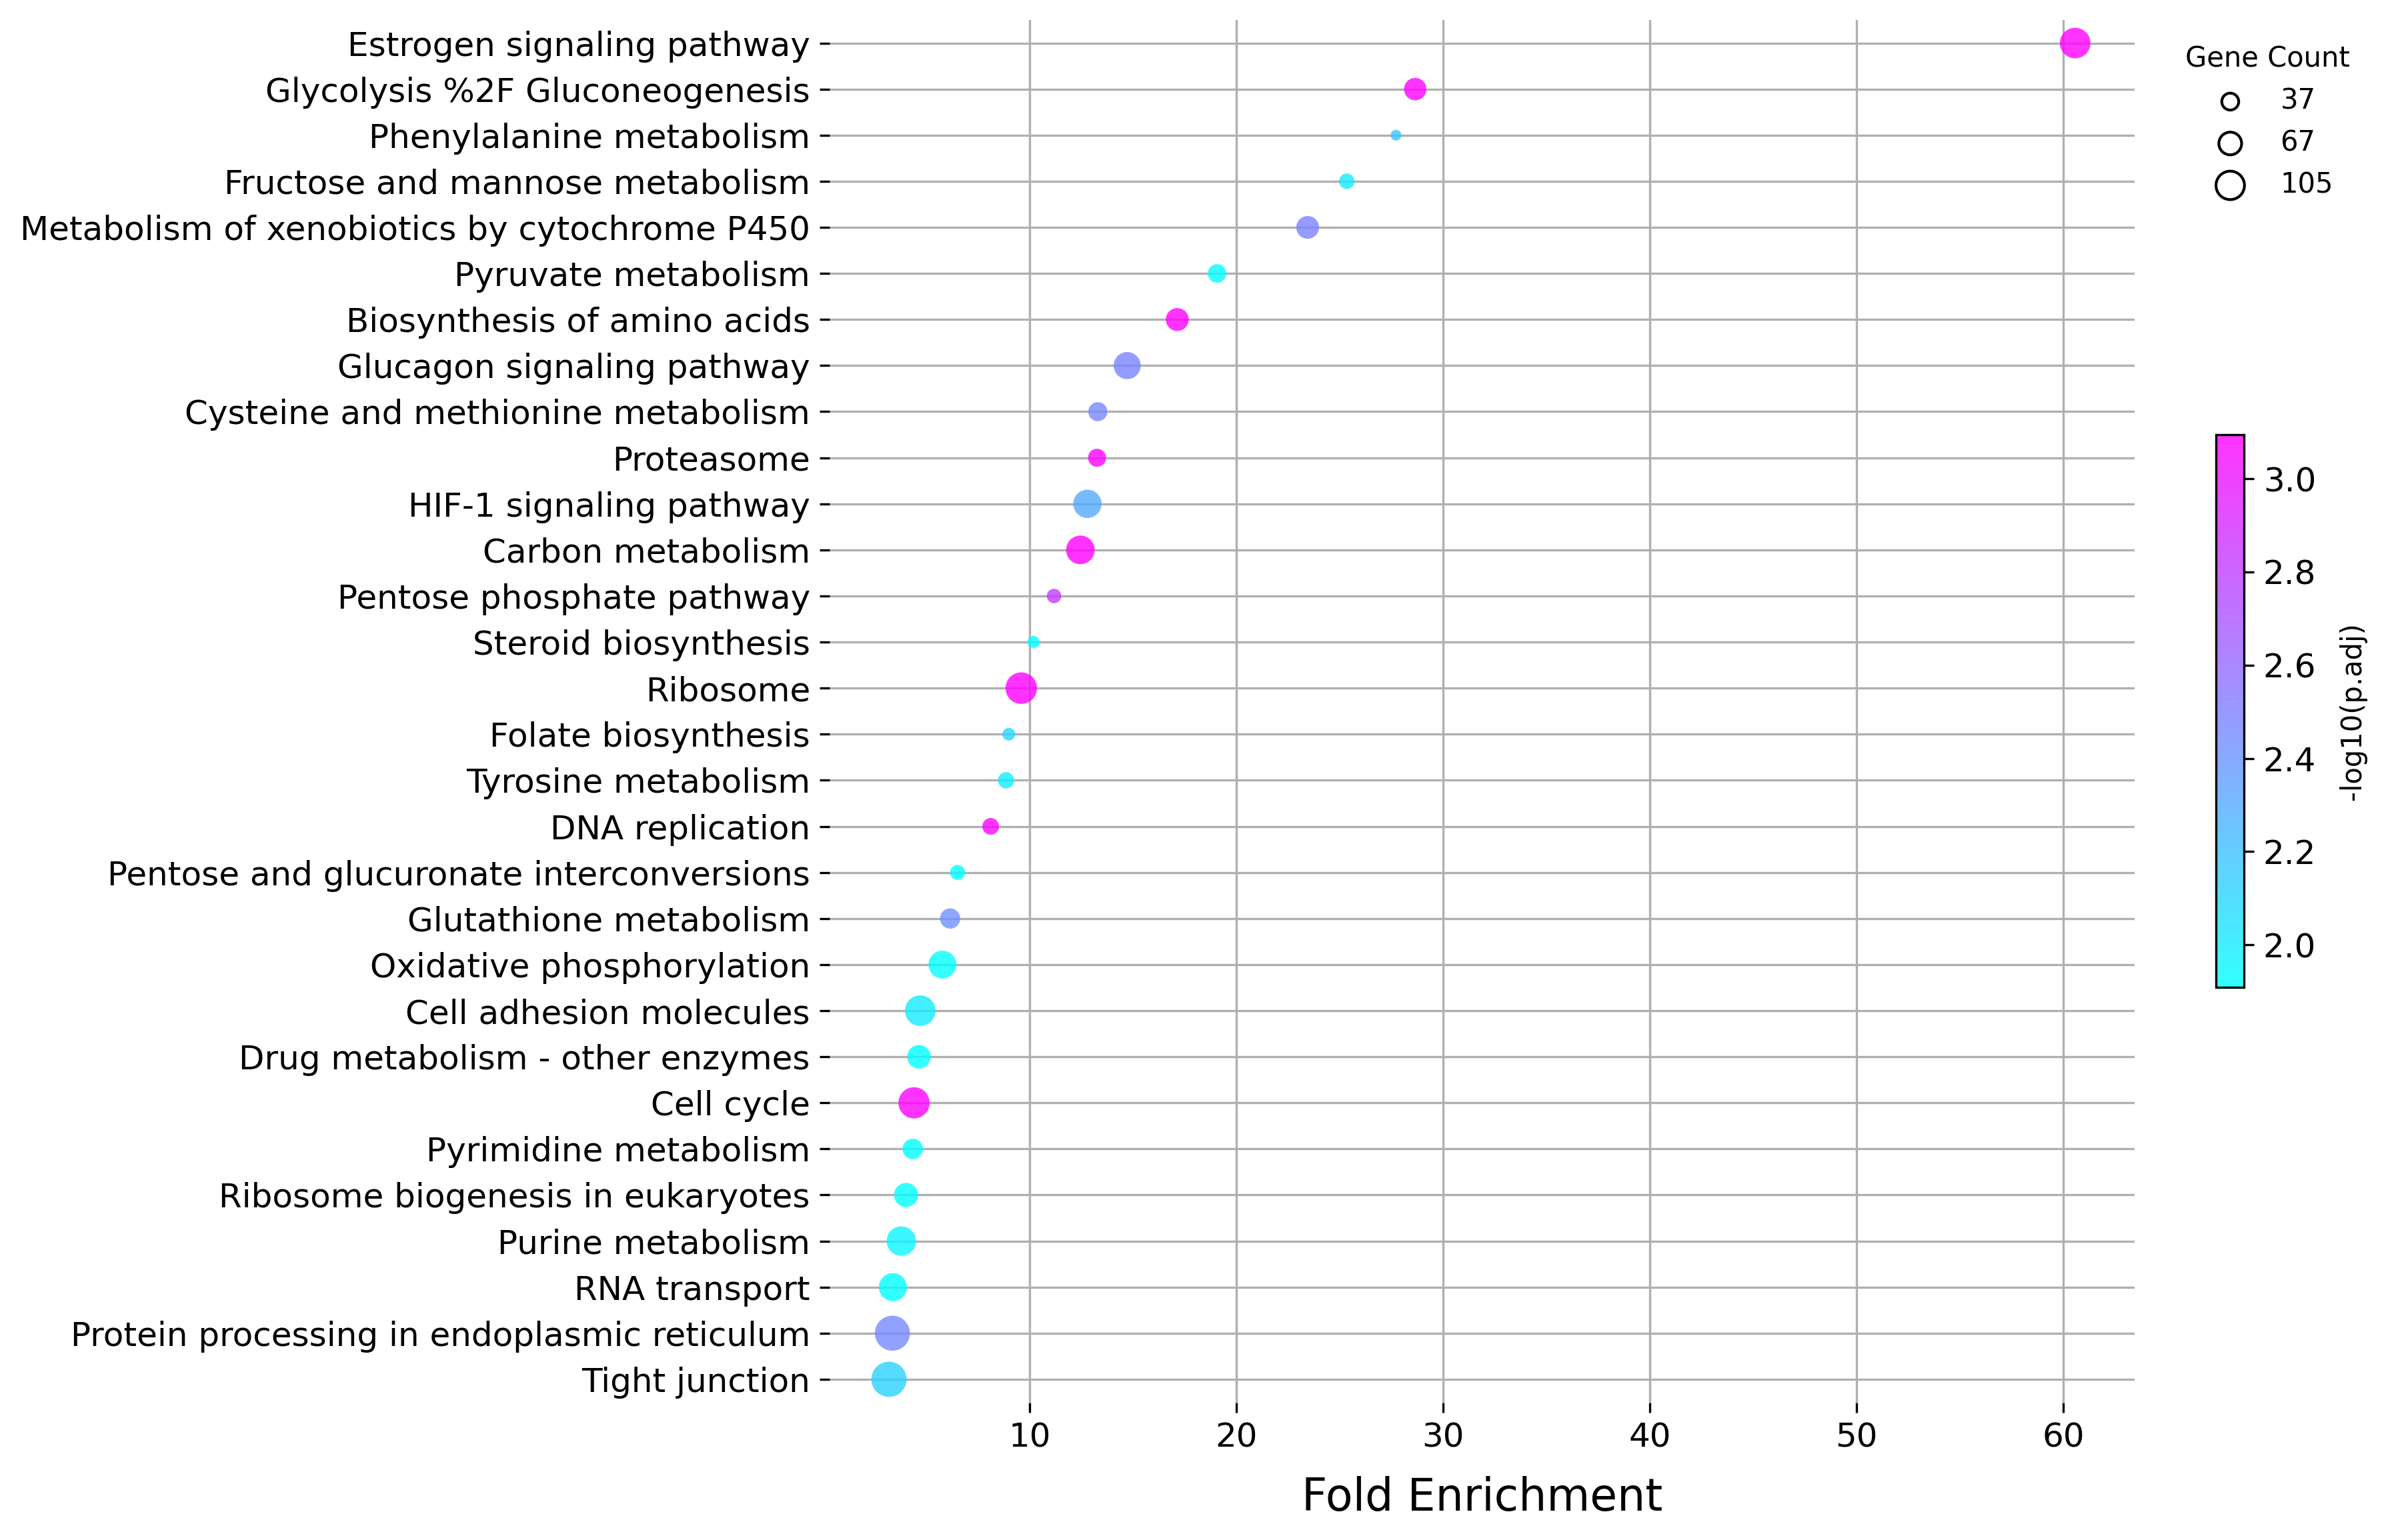

In [20]:
## check significant pathways for a sensor in receiver cell
## a interesting sensor in receiver cell should be defined by users,
## Visualization of communications in Demo_Communication_Predict tutorial will help to users.

## here, take SLC1A5 in Malignant cells as an example
mebo_obj.pathway_scatter(
                            a_pair='SLC1A5 ~ Malignant',
                            pval_cutoff=0.05,
                            ES_cutoff=0,
                            cmap='cool',
                            vmax=None,
                            vmin=None,
                            figsize='auto',
                            title='',
                            maxSize=500,
                            minSize=15,
                            save=None,
                            show_plot=True
                        )


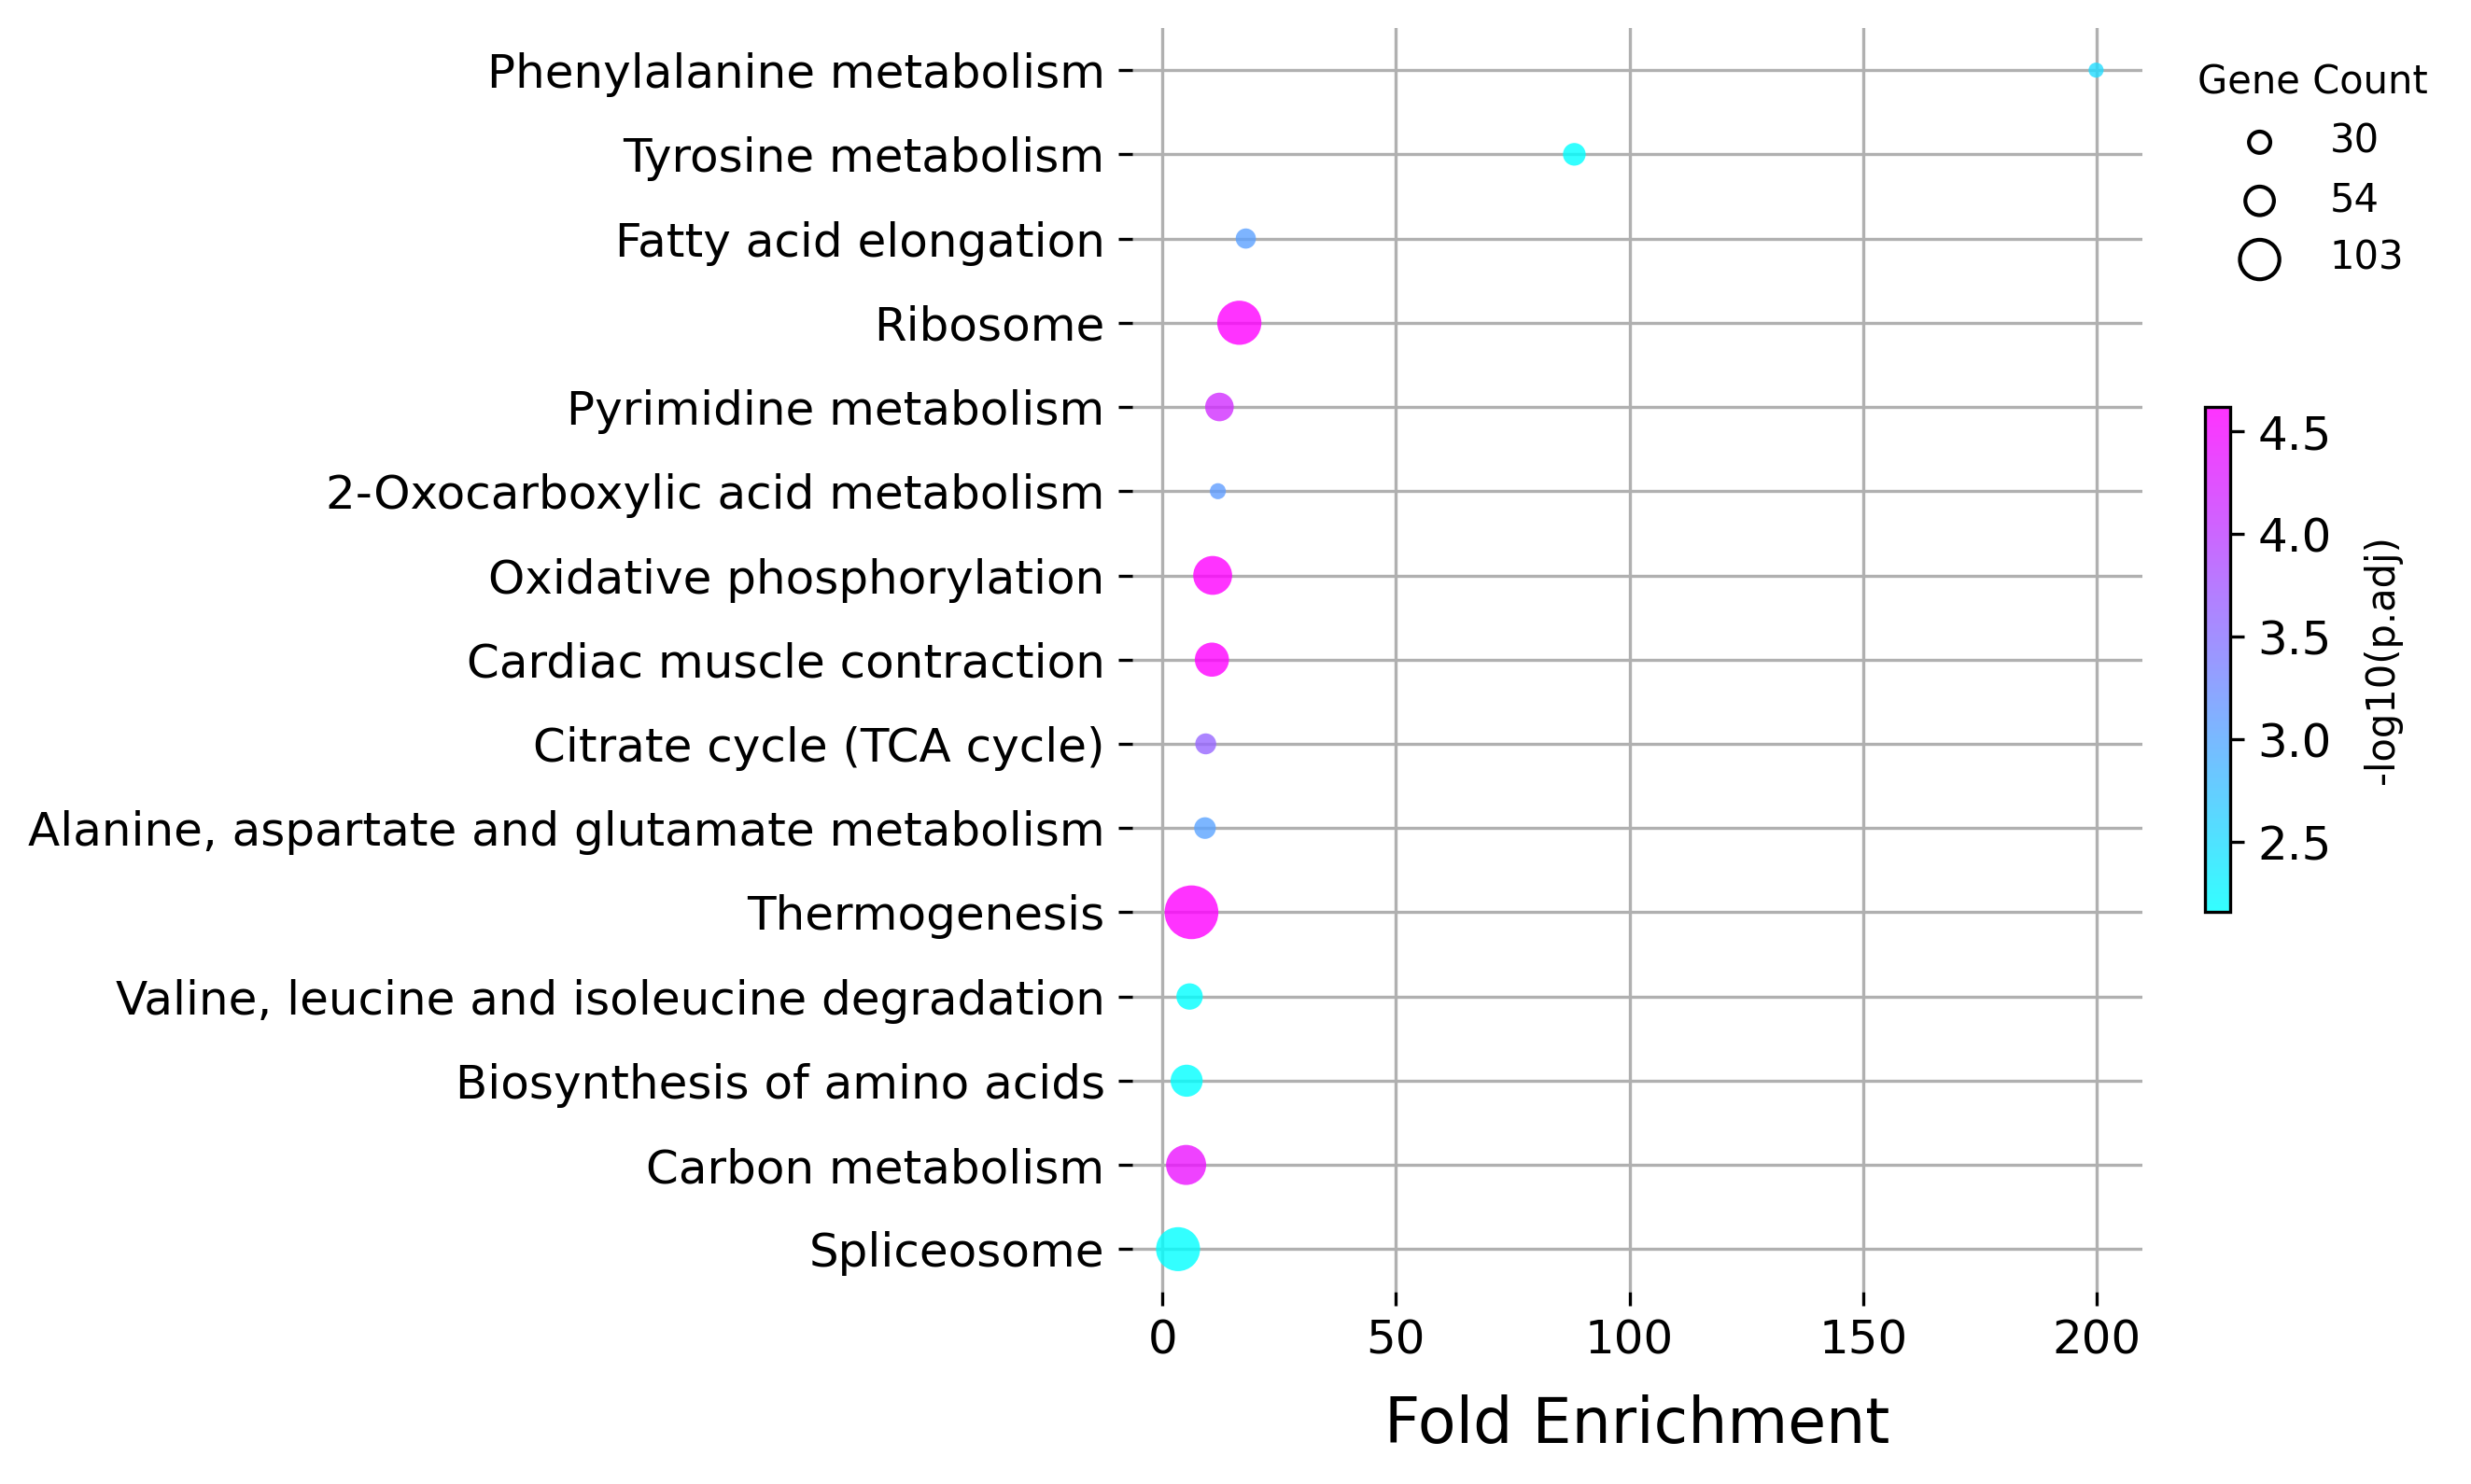

In [21]:
## check pathway for a pair of sender and receiver
## sender is Endothelial and receiver is Malignant
mebo_obj.pathway_scatter(
                            a_pair='Endothelial ~ Malignant',
                            pval_cutoff=0.05,
                            ES_cutoff=0,
                            cmap='cool',
                            vmax=None,
                            vmin=None,
                            figsize='auto',
                            title='',
                            maxSize=500,
                            minSize=15,
                            save=None,
                            show_plot=True
                        )


#### 2.2 Comparing the pathways for two sensors in receivers

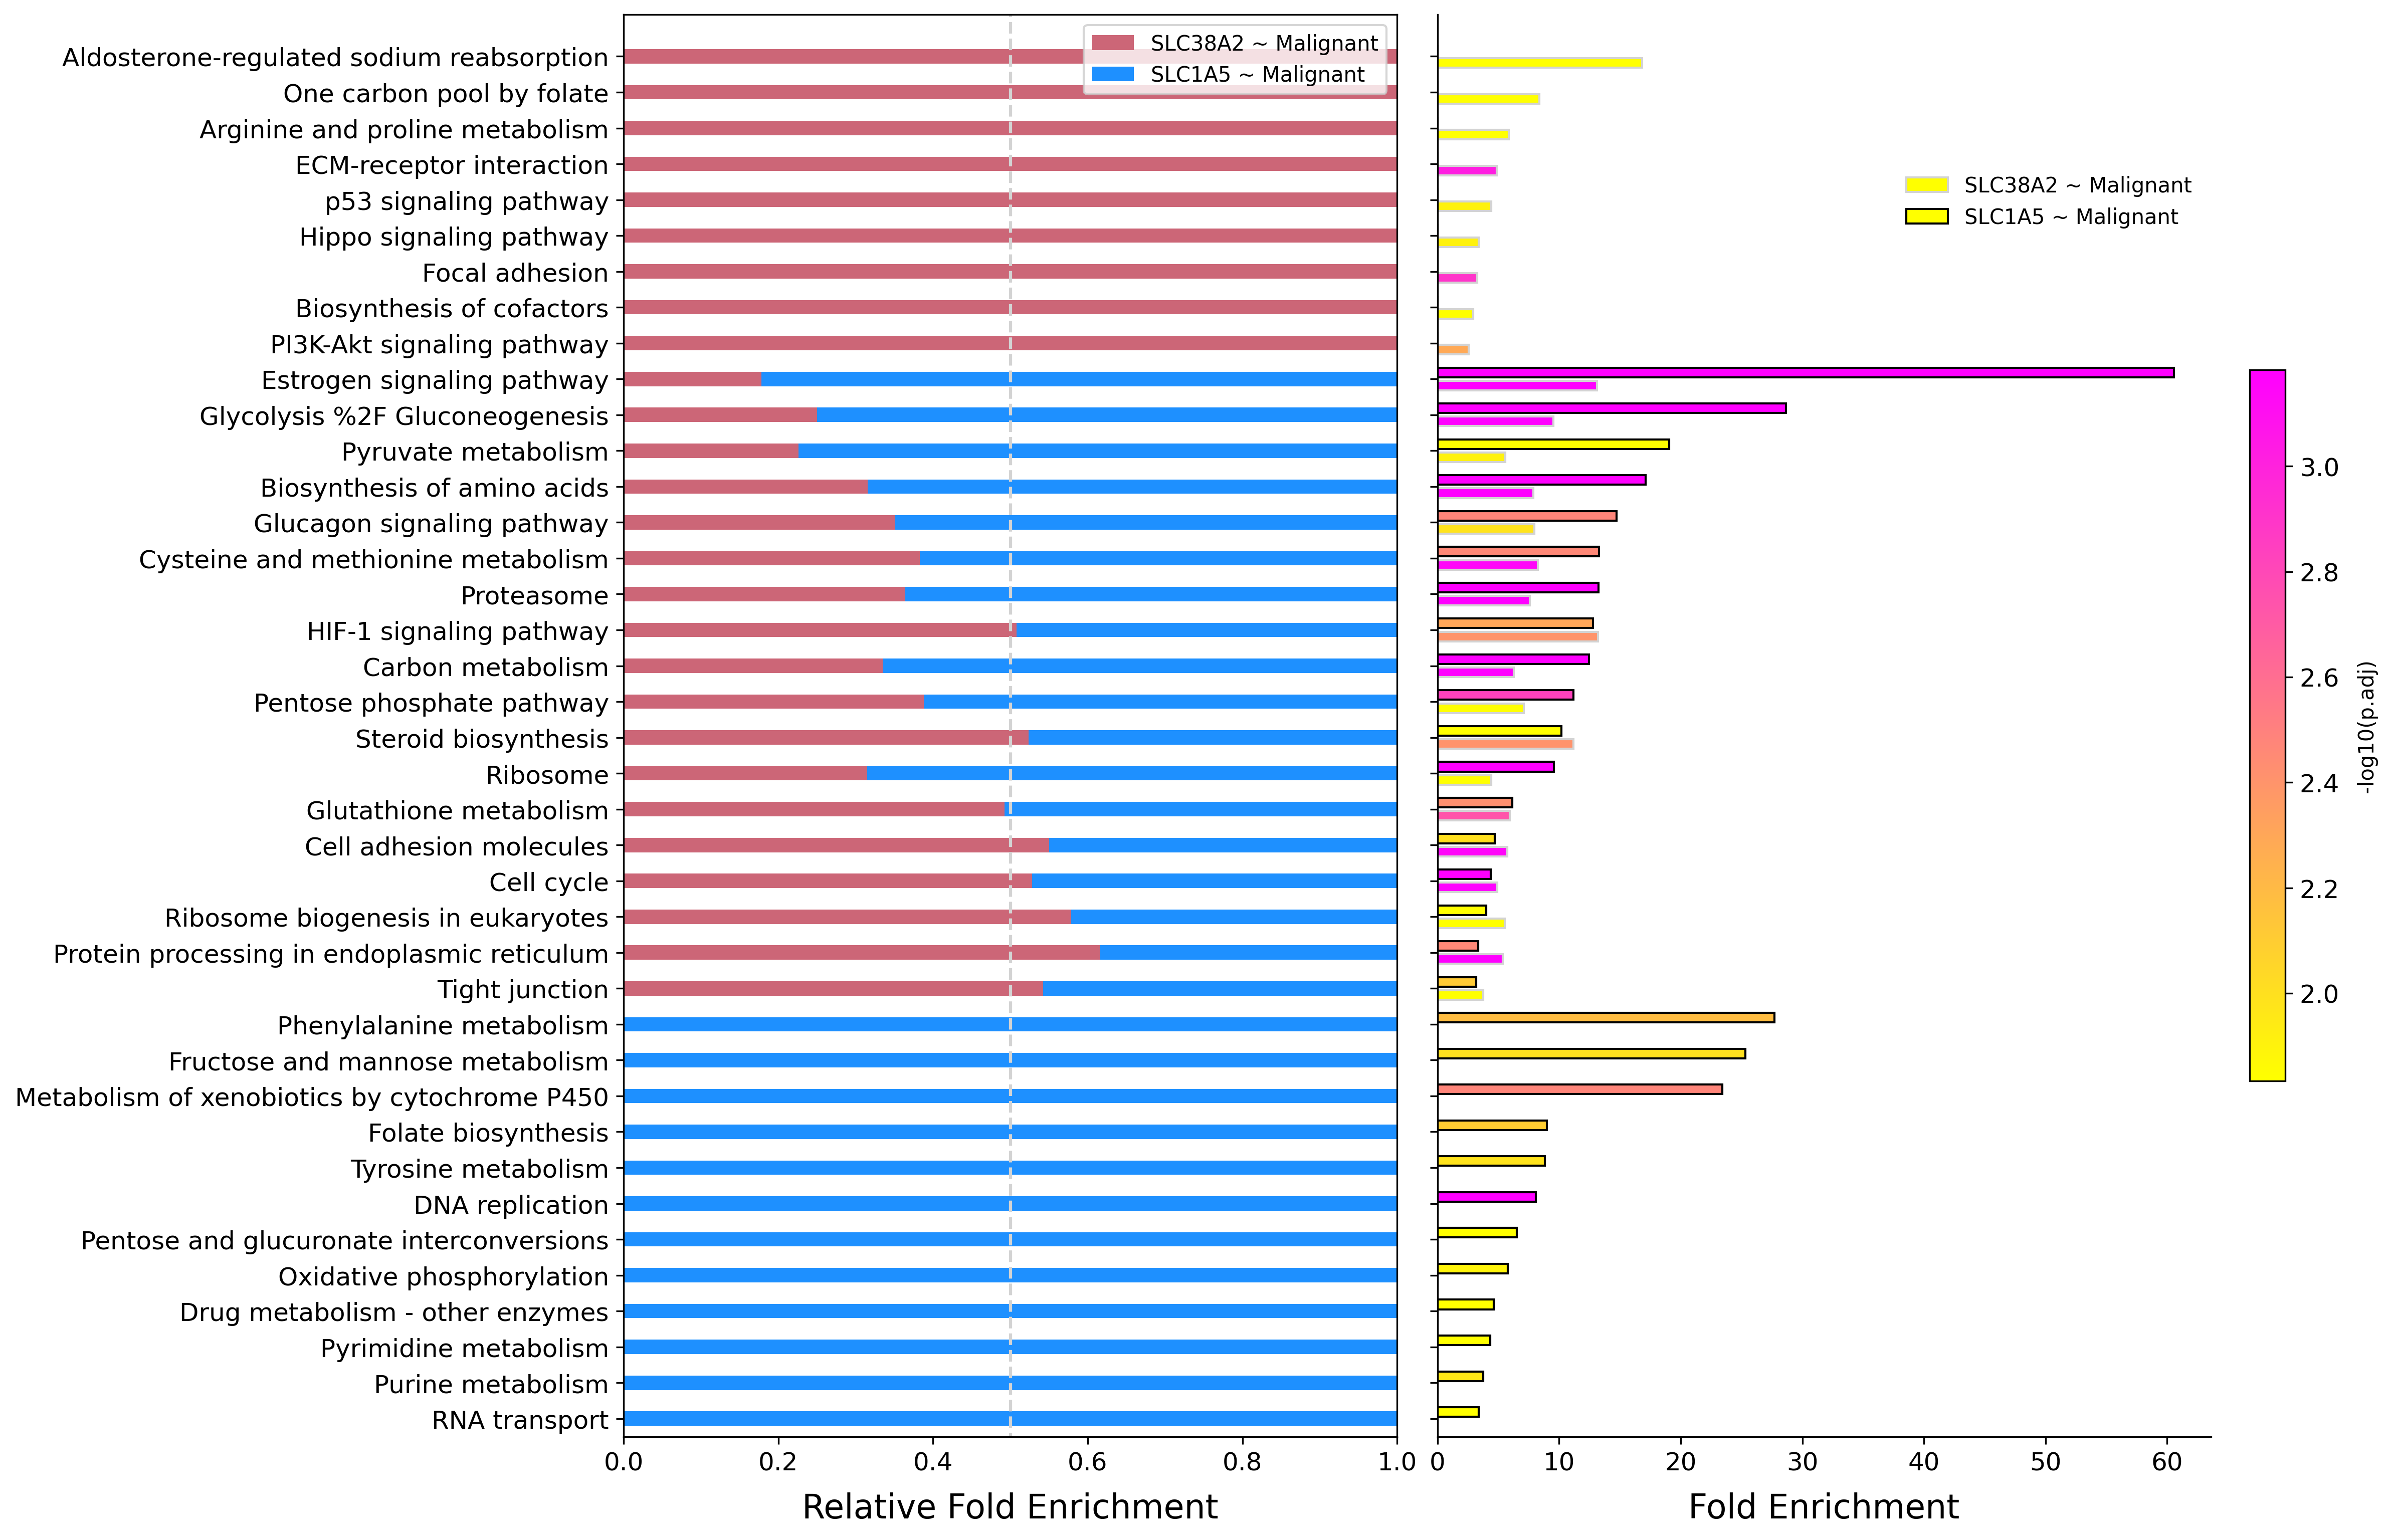

In [23]:
mebo_obj.pathway_stacked_bar(
                        pair1='SLC38A2 ~ Malignant',
                        pair2='SLC1A5 ~ Malignant',
                        pval_cutoff=0.05,
                        ES_cutoff=0,
                        cmap='spring_r',
                        vmax=None,
                        vmin=None,
                        figsize='auto',
                        title='',
                        maxSize=500,
                        minSize=15,
                        colors=['#CC6677', '#1E90FF'],
                        save=None,
                        show_plot=True,
                        return_fig=False
                        )


<p>In this stacked bar plot, only fold enrichment score for significant enrichment was shown in the figure, fold enrichment score of non-significant pathways was turned to zero.
To generate this figure for two pairs of sender and receiver cells, just provide two pair of sender and receiver through `pair1` and `pair2` parameters. 
</p>

### 2.3 Visualization of pathway associations across multiple communications
<p>The multiple communications are usually a list of sensor ~ receiver, or a list of sender ~ receiver</p>

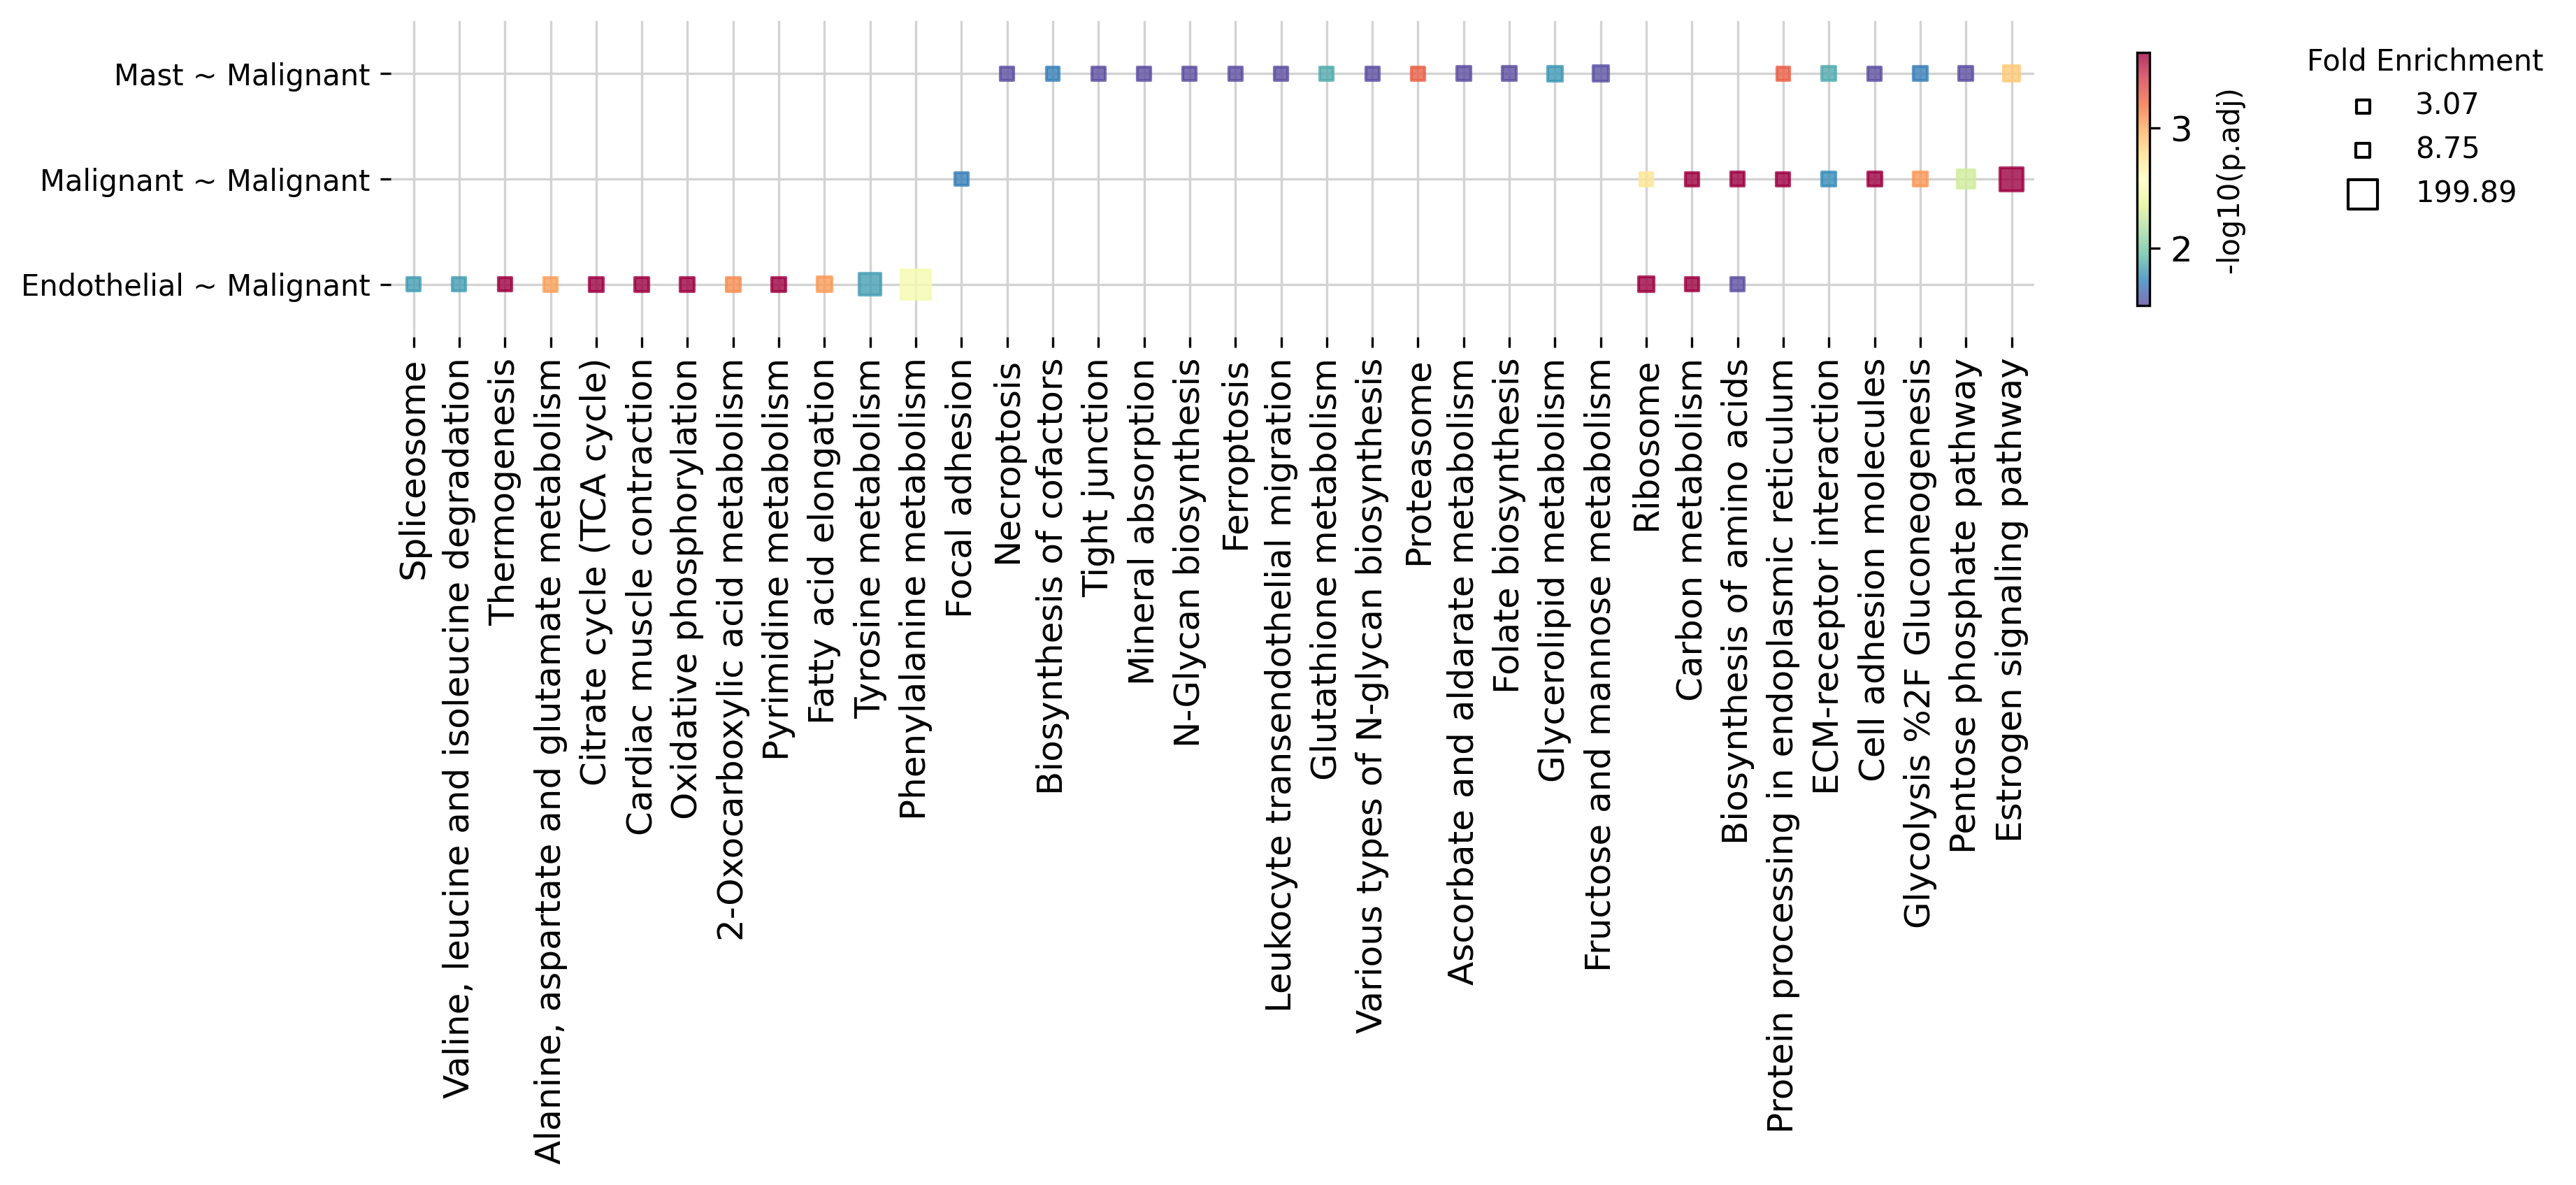

In [25]:
### here taking sender ~ receiver as an example
mebo_obj.pathway_multi_dot(
                        pairs = ['Malignant ~ Malignant', 'Mast ~ Malignant', 'Endothelial ~ Malignant'],
                        pval_cutoff=0.05,
                        ES_cutoff=0,
                        cmap='Spectral_r',
                        vmax=None,
                        vmin=None,
                        node_size_norm=(20, 100),
                        figsize='auto',
                        title='',
                        maxSize=500,
                        minSize=15,
                        save=None,
                        show_plot=True,
                        swap_axis=True,
                        return_fig=False
                    )


<p>In this plot, users can check common and specific pathways for given sender and receiver communications.</p>

### 2.4 Enrichment curve of the significant pathway under a sensor in receiver
<p>In the enrichment figure, left panel will show the scatter plot between actual expression status of genes in the given receiver cells and the correlation of genes with sensor gene from a large scale of RNA-seq data. Right panel will show the running enrichment score by combining the scores of x and y axises. The genes of a significant associated pathway should rank toward the highly associated side (left side)</p>

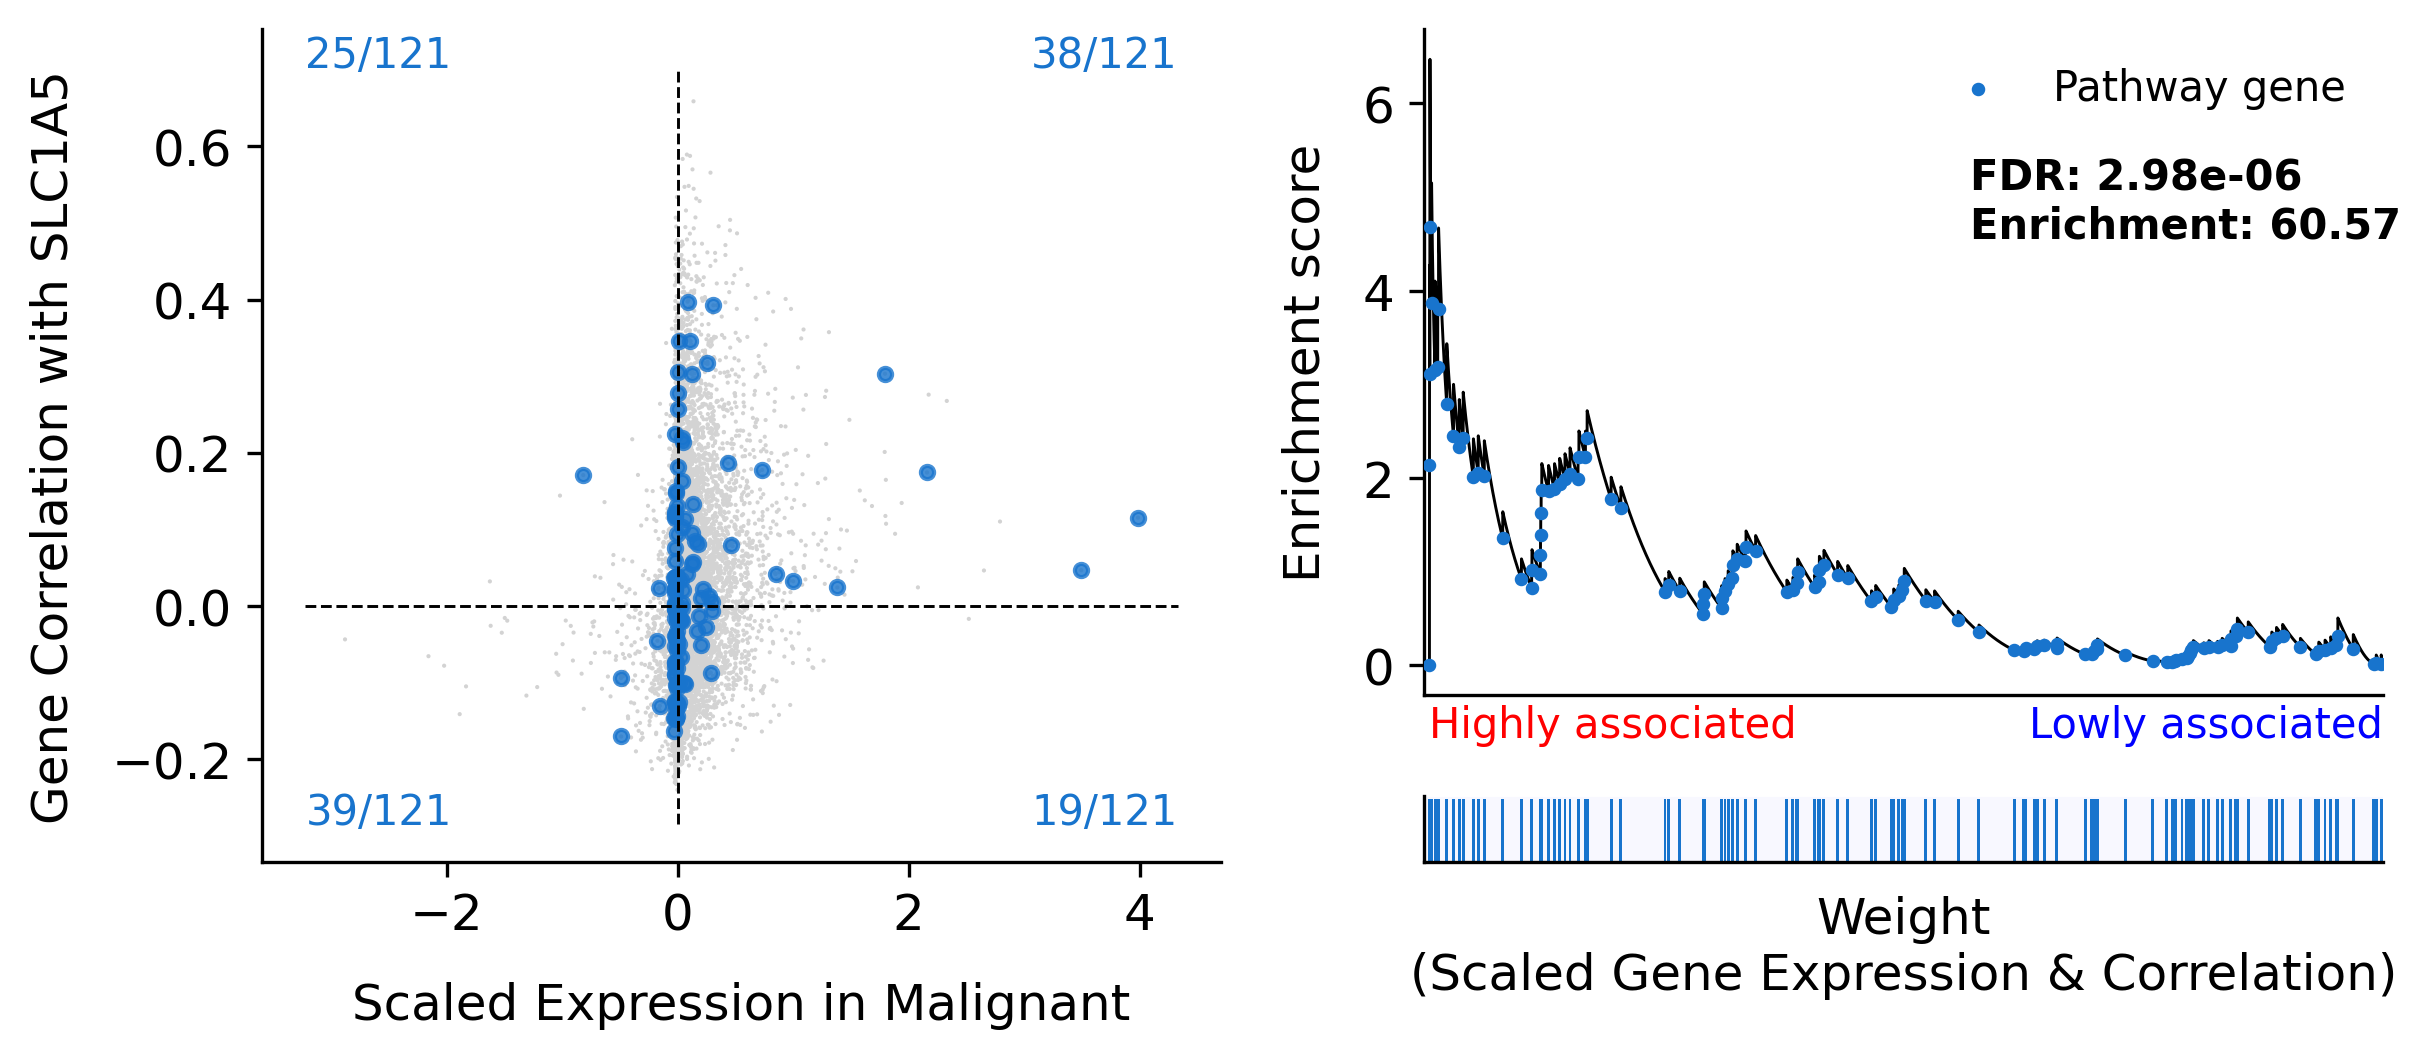

In [27]:
## here taking 'Estrogen signaling pathway' in 'SLC1A5 ~ Malignant' as an example
mebo_obj.pathway_ES_plot(
                        a_pair='SLC1A5 ~ Malignant',
                        pathway='Estrogen signaling pathway',
                        figsize=(8, 3.5),
                        dot_color='#1874CD',
                        curve_color='black',
                        title='',
                        save=None,
                        show_plot=True,
                        return_fig=False,
                        return_data=False
                    )



### 2.5 Save figures

<p>Figures can be saved by two methods, one is pass the file name by 'save' parameter for each plotting function. Another way to save figure is to set return_fig = True, then save fig separately. Similar with section 2.6.2 in Demo_Communication_Prediction</p>

### 2.6 Interactive visualization of pathway association inference
<p>To provide a user-friendly visualization of mebocost result, especially for those datasets with large number of communication events, notebook interactive view shed lights in. We developed the Jupyter interactive widgets to mimic webpage. 
NOTE: this function can only be used in Jupyter notebook 
</p> 

In [3]:
mebo_obj.pathway_in_notebook()
